In [1]:
import spacy
import pandas as pd

In [2]:
nlp = spacy.load('en_core_web_sm')


In [6]:
file  = r'C:\Users\daniy\Documents\vu\nlp\SemEval2018-Task3\datasets\goldtest_TaskB\SemEval2018-T3_gold_test_taskB_emoji.txt'
df = pd.read_csv(file, sep = '\t' )


In [7]:
df.head()

,Tweet index,Label,Tweet text
0,1,0,@Callisto1947 Can U Help?||More conservatives ...
1,2,2,"Just walked in to #Starbucks and asked for a ""..."
2,3,0,#NOT GONNA WIN http://t.co/Mc9ebqjAqj
3,4,0,@mickymantell He is exactly that sort of perso...
4,5,1,So much #sarcasm at work mate 10/10 #boring 10...


In [8]:
import random
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


In [9]:
#generate random predicitions
df['prediction_rand'] = [random.randint(0,3) for  i in range(len(df))]


In [11]:
#Overall accuracy with random predictions
accuracy_score(df['Label'], df['prediction_rand'])

0.2538265306122449

In [12]:
#classification report with random predictions
print(classification_report(df['Label'], df['prediction_rand']))

              precision    recall  f1-score   support

           0       0.59      0.22      0.32       473
           1       0.23      0.29      0.25       164
           2       0.16      0.34      0.21        85
           3       0.09      0.32      0.14        62

    accuracy                           0.25       784
   macro avg       0.27      0.29      0.23       784
weighted avg       0.43      0.25      0.28       784



In [14]:
#Accuracy by class with random predictions
cm = confusion_matrix(df['Label'], df['prediction_rand'])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
pd.DataFrame({'Labels': [0,1,2,3], 'Accuracy': cm.diagonal()})

,Labels,Accuracy
0,0,0.217759
1,1,0.286585
2,2,0.341176
3,3,0.322581


<AxesSubplot:>

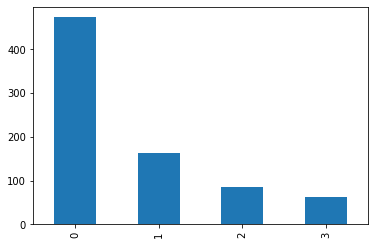

In [22]:
#Label distribution 
df['Label'].value_counts().plot.bar()

In [23]:
#Generate predictions with majority label
df['prediction_maj'] = [0]*len(df)

In [24]:
#Overall accuracy with majority prediction
accuracy_score(df['Label'], df['prediction_maj'])

0.6033163265306123

In [25]:
#Classification report of majority predictions
#Note some warnings will be seen because predictions only contain 1 label (Label 0)
print(classification_report(df['Label'], df['prediction_maj']))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       473
           1       0.00      0.00      0.00       164
           2       0.00      0.00      0.00        85
           3       0.00      0.00      0.00        62

    accuracy                           0.60       784
   macro avg       0.15      0.25      0.19       784
weighted avg       0.36      0.60      0.45       784



c:\Users\daniy\Documents\vu\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\daniy\Documents\vu\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\daniy\Documents\vu\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#Accuracy by class for majority prediction
cm = confusion_matrix(df['Label'], df['prediction_maj'])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
pd.DataFrame({'Labels': [0,1,2,3], 'Accuracy': cm.diagonal()})

,Labels,Accuracy
0,0,1.0
1,1,0.0
2,2,0.0
3,3,0.0
